## **Imports**

In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import *

## **Προεπεξεργασία/Καθάρισμα Δεδομένων**

In [2]:
fake_data_raw = pd.read_csv("Fake.csv")
fake_data_raw.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true_data_raw = pd.read_csv("True.csv")
true_data_raw.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_data = fake_data_raw.dropna()

fake_data['title'] = fake_data['title'].str.replace('[^\w\s]','')
fake_data['text'] = fake_data['text'].str.replace('[^\w\s]','')
fake_data['subject'] = fake_data['subject'].str.replace('[^\w\s]','')

fake_data['title'] = fake_data['title'].str.lower()
fake_data['text'] = fake_data['text'].str.lower()
fake_data['subject'] = fake_data['subject'].str.lower()

fake_data.head()

,title,text,subject,date
0,donald trump sends out embarrassing new years...,donald trump just couldn t wish all americans ...,news,"December 31, 2017"
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,"December 31, 2017"
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,news,"December 30, 2017"
3,trump is so obsessed he even has obamas name ...,on christmas day donald trump announced that h...,news,"December 29, 2017"
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,"December 25, 2017"


In [5]:
true_data = true_data_raw.dropna()

true_data['title'] = true_data['title'].str.replace('[^\w\s]','')
true_data['text'] = true_data['text'].str.replace('[^\w\s]','')
true_data['subject'] = true_data['subject'].str.replace('[^\w\s]','')

true_data['title'] = true_data['title'].str.lower()
true_data['text'] = true_data['text'].str.lower()
true_data['subject'] = true_data['subject'].str.lower()

true_data.head()

,title,text,subject,date
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,politicsnews,"December 31, 2017"
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,politicsnews,"December 29, 2017"
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,politicsnews,"December 31, 2017"
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,politicsnews,"December 30, 2017"
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,politicsnews,"December 29, 2017"


## **Μελέτη των Δεδομένων**

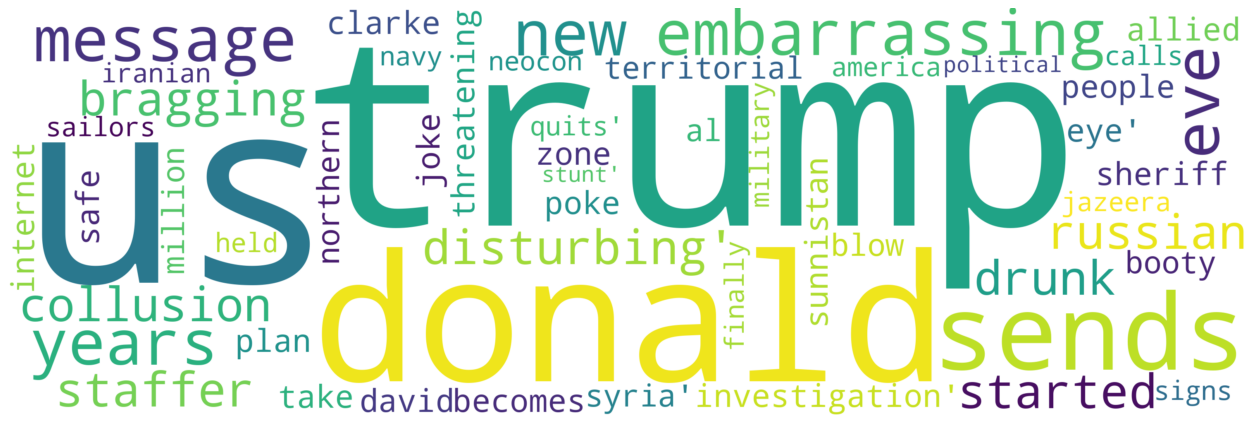

In [6]:
fake_titles_array = fake_data['title'].values

wordcloud = WordCloud(width=3000,height=1000, background_color = "white", ).generate(str(fake_titles_array))

figure(figsize=(20, 8), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

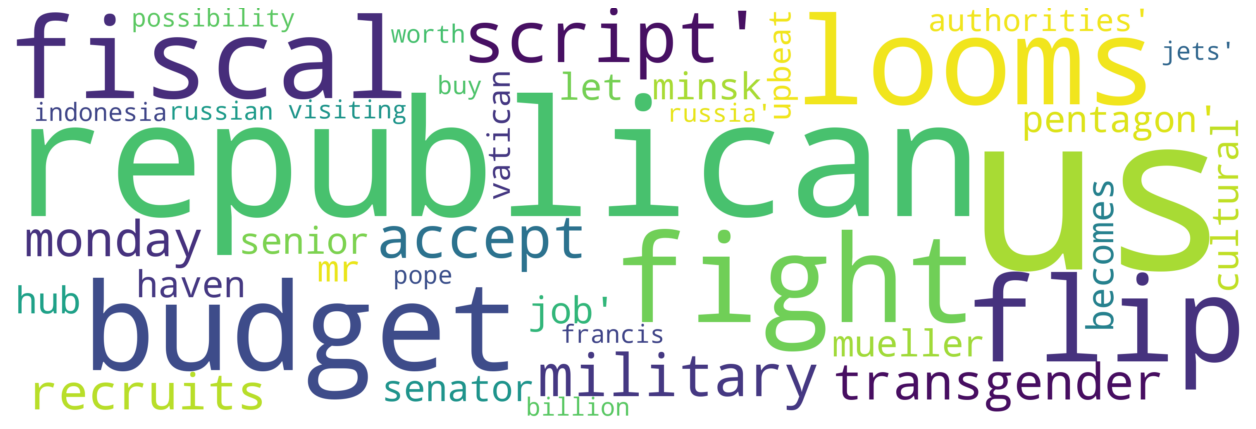

In [7]:
true_titles_array = true_data['title'].values

wordcloud = WordCloud(width=3000,height=1000, background_color = "white", ).generate(str(true_titles_array))

figure(figsize=(20, 8), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

In [8]:
fake_titles_strlen = fake_data['title'].str.len()
fake_titles_strlen.head()
fake_titles_average_chars = fake_titles_strlen.mean()

fake_texts_strlen = fake_data['text'].str.len()
fake_texts_strlen.head()
fake_texts_average_chars = fake_texts_strlen.mean()

true_titles_strlen = true_data['title'].str.len()
true_titles_strlen.head()
true_titles_average_chars = true_titles_strlen.mean()

true_texts_strlen = true_data['text'].str.len()
true_texts_strlen.head()
true_texts_average_chars = true_texts_strlen.mean()

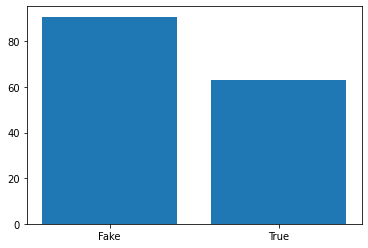

63.077601905028715


In [9]:
plt.bar(['Fake', 'True'],[fake_titles_average_chars, true_titles_average_chars])
plt.show()
print(true_titles_average_chars)

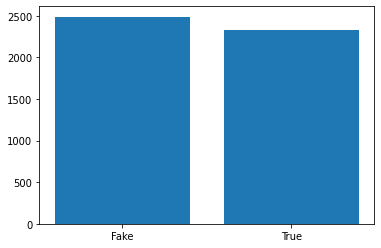

2324.2169771676704


In [10]:
plt.bar(['Fake', 'True'],[fake_texts_average_chars, true_texts_average_chars])
plt.show()
print(true_texts_average_chars)

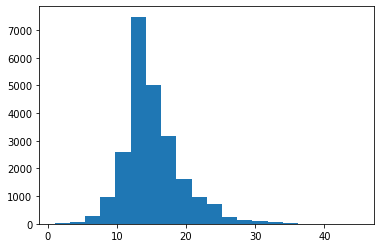

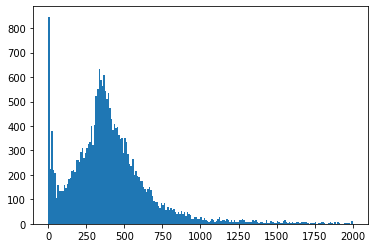

In [11]:
fake_titles_word_count = fake_data['title'].str.count(' ')+1
fake_titles_word_count.head()

plt.hist(fake_titles_word_count, bins=20)
plt.show()

fake_text_word_count = fake_data['text'].str.count(' ')+1
fake_text_word_count.head()

plt.hist(fake_text_word_count, bins=200, range=(0, 2000))
plt.show()

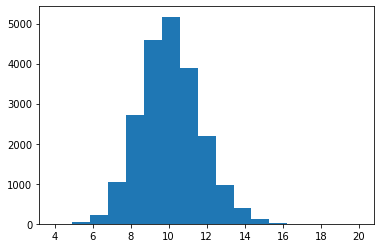

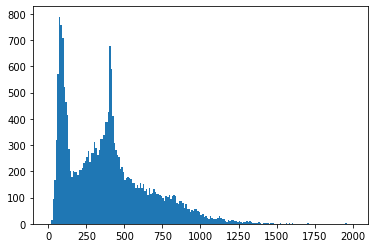

In [12]:
true_titles_word_count = true_data['title'].str.count(' ')+1
true_titles_word_count.head()

plt.hist(true_titles_word_count, bins=17)
plt.show()

true_text_word_count = true_data['text'].str.count(' ')+1
true_text_word_count.head()

plt.hist(true_text_word_count, bins=200, range=(0, 2000))
plt.show()

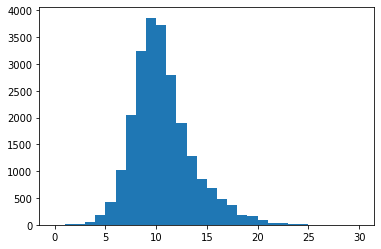

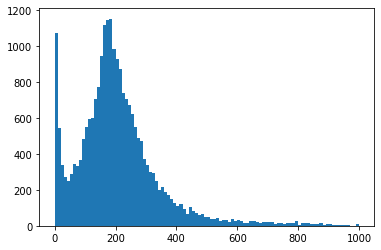

In [13]:
fake_data_no_stopwords = fake_data
fake_data_no_stopwords['title'] = fake_data_no_stopwords.title.apply(remove_stopwords)
fake_data_no_stopwords['text'] = fake_data_no_stopwords.text.apply(remove_stopwords)
fake_data_no_stopwords

fake_titles_word_count = fake_data_no_stopwords['title'].str.count(' ')+1
fake_titles_word_count.head()

plt.hist(fake_titles_word_count, bins=30, range=(0,30))
plt.show()

fake_text_word_count = fake_data_no_stopwords['text'].str.count(' ')+1
fake_text_word_count.head()

plt.hist(fake_text_word_count, bins=100, range=(0, 1000))
plt.show()

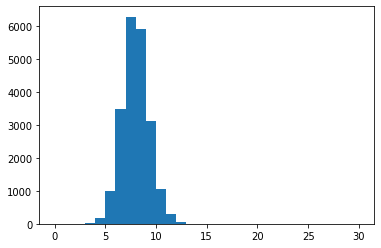

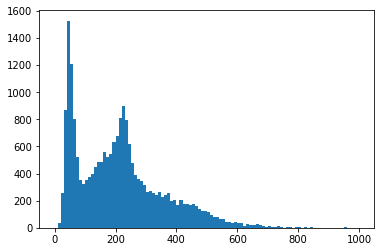

In [14]:
true_data_no_stopwords = true_data
true_data_no_stopwords['title'] = true_data_no_stopwords.title.apply(remove_stopwords)
true_data_no_stopwords['text'] = true_data_no_stopwords.text.apply(remove_stopwords)
true_data_no_stopwords

true_titles_word_count = true_data_no_stopwords['title'].str.count(' ')+1
true_titles_word_count.head()

plt.hist(true_titles_word_count, bins=30, range=(0,30))
plt.show()

true_text_word_count = true_data_no_stopwords['text'].str.count(' ')+1
true_text_word_count.head()

plt.hist(true_text_word_count, bins=100, range=(0, 1000))
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

def most_frequent_bigrams(series, n=20, min_words=2, max_words=2):
  series_corpus = series.tolist()

  series_vector = CountVectorizer(ngram_range = (min_words, max_words), binary = False, max_features = 10000, min_df =0.001)

  series_df = pd.DataFrame(series_vector.fit_transform(series_corpus).toarray())

  series_df_summed = series_df.sum(axis=0).sort_values(ascending=False)

  results = []

  for item in series_df_summed.index:
    results.append(series_vector.get_feature_names()[item])

  return results[:n]

In [16]:
most_frequent_bigrams(fake_data['title'])

['donald trump',
 'president trump',
 'hillary clinton',
 'white house',
 'fox news',
 'trump video',
 'bernie sanders',
 'boiler room',
 'ted cruz',
 'fake news',
 'trump supporters',
 'trump supporter',
 'supreme court',
 'lives matter',
 'black lives',
 'president obama',
 'room ep',
 'paul ryan',
 'watch trump',
 'kellyanne conway']

In [17]:
most_frequent_bigrams(true_data['title'])

['white house',
 'north korea',
 'trump says',
 'islamic state',
 'supreme court',
 'puerto rico',
 'travel ban',
 'factbox trump',
 'south korea',
 'trump administration',
 'says trump',
 'nuclear deal',
 'house speaker',
 'new york',
 'russia probe',
 'trump twitter',
 'foreign minister',
 'north korean',
 'attorney general',
 'saudi arabia']

In [18]:
most_frequent_bigrams(fake_data['text'])

['donald trump',
 'hillary clinton',
 'white house',
 'united states',
 'new york',
 'president obama',
 'president trump',
 'fox news',
 '21st century',
 'barack obama',
 'century wire',
 'fake news',
 'supreme court',
 'trump campaign',
 'trump realdonaldtrump',
 'obama administration',
 'national security',
 'social media',
 'law enforcement',
 'secretary state']

In [19]:
most_frequent_bigrams(true_data['text'])

['united states',
 'white house',
 'donald trump',
 'washington reuters',
 'president donald',
 'north korea',
 'new york',
 'prime minister',
 'said statement',
 'trump said',
 'told reuters',
 'islamic state',
 'told reporters',
 'president barack',
 'supreme court',
 'barack obama',
 'united nations',
 'house representatives',
 'secretary state',
 'hillary clinton']

## **Δημιουργία Συνόλου Εκμάθησης & Δοκιμής**

In [20]:
from math import floor, ceil

fake_data['label'] = 0
true_data['label'] = 1
all_data = fake_data
all_data = all_data.append(true_data).reset_index(drop=True)

all_data = all_data.sample(frac=1).reset_index(drop=True)

def create_files(df, train_ratio, df_max_size= None):
  if(df_max_size is not None):
    df = df.head(df_max_size)
  train_size = int(train_ratio * (df.shape[0]-1))
  test_size = df.shape[0] - 1 - train_size
  #print(df.shape)
  train_data = df.head(train_size)
  #print(train_data.shape)
  test_data = df.tail(test_size)
  #print(testing_data.shape)
  train_data.to_csv('train.csv', index=False)
  test_data.to_csv('test.csv', index=False)

create_files(all_data, 0.75, 1000000)

In [21]:
test1 = pd.read_csv('train.csv')
test1.head(10)

,title,text,subject,date,label
0,greek police cut size eu court rules women,luxembourg reuters european police forces impo...,worldnews,"October 18, 2017",1
1,wedge issue texas golf range offers clinton tr...,longview texas reuters looking way help reliev...,politicsnews,"November 2, 2016",1
2,thousands indonesians join antimyanmar rally j...,jakarta reuters thousands indonesians led isla...,worldnews,"September 6, 2017",1
3,ohio republicans create step privatizing elect...,republican obsession making difficult vote rea...,news,"May 27, 2016",0
4,asia investors traders bet clinton win bruisin...,sydneysingapore reuters investors traders asia...,politicsnews,"October 10, 2016",1
5,fbi director comey testify house panel thursday,reuters fbi director james comey set testify h...,politicsnews,"July 6, 2016",1
6,obama tells latin america world trump time don...,lima reuters president barack obama latin amer...,politicsnews,"November 20, 2016",1
7,uk lawmakers governments proposed timetable de...,london reuters british lawmakers tuesday voted...,worldnews,"September 11, 2017",1
8,young man delivers powerful message liberals f...,wow young asian student nails speaks american ...,politics,"Feb 16, 2017",0
9,awesome conservative artist crashes antitrump ...,favorite conservative street artist sabo crash...,politics,"Nov 13, 2017",0


## **Υλοποίηση Κατηγοριοποίησης (Classification)**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

### **Διάβασμα Train/Test Αρχείων**

In [23]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df = train_df.fillna('')
test_df = test_df.fillna('')

train_documents = (train_df['title'] + ' ' + train_df['text'] + ' ' + train_df['subject']).tolist()
test_documents = (test_df['title'] + ' ' + test_df['text'] + ' ' + test_df['subject']).tolist()

### **Δημιουργία Bag of Words**

In [24]:
bow_count_vectorizer = CountVectorizer(ngram_range = (1,1), min_df = 0.05 )
bow_count_vectorizer.fit(train_documents)

train_bow = bow_count_vectorizer.transform(train_documents)
train_bow_df = pd.DataFrame(train_bow.toarray())

test_bow = bow_count_vectorizer.transform(test_documents)
test_bow_df = pd.DataFrame(test_bow.toarray())

### **Δημιουργία Tf-Idf**

In [25]:
tf_idf_vectorizer = TfidfVectorizer(ngram_range = (1,1), min_df = 0.05 )
tf_idf_vectorizer.fit(train_documents)

train_tf_idf = tf_idf_vectorizer.transform(train_documents)
train_tf_idf_df = pd.DataFrame(train_tf_idf.toarray())

test_tf_idf = tf_idf_vectorizer.transform(test_documents)
test_tf_idf_df = pd.DataFrame(test_tf_idf.toarray())

### **Δημιουργία Word2vec**

In [26]:
import gensim.downloader

glove_vectors = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [27]:
import numpy as np

train_document_vectors = []

for text in train_documents:
  vectors = []
  for word in text.split(' '):
    try:
      vectors.append(glove_vectors[word])
    except KeyError:
      vectors.append([0] * 25)
  data = np.array(vectors)
  train_document_vectors.append(np.average(data, axis=0).tolist())


test_document_vectors = []

for text in test_documents:
  vectors = []
  for word in text.split(' '):
    try:
      vectors.append(glove_vectors[word])
    except KeyError:
      vectors.append([0] * 25)
  data = np.array(vectors)
  test_document_vectors.append(np.average(data, axis=0).tolist())



### **Εκπαίδεση/Αξιολόγηση με Bag of Words**

**Logistic Regression**

In [28]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(train_bow_df, train_df['label'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
logistic_regression_model.score(test_bow_df, test_df['label'])

0.999554565701559

In [30]:
predictions = logistic_regression_model.predict(test_bow_df)
f1_score(test_df['label'], predictions)

0.999528257382772

**Naive Bayes**

In [31]:
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(train_bow_df, train_df['label'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
naive_bayes_model.score(test_bow_df, test_df['label'])

0.9346102449888641

In [33]:
predictions = naive_bayes_model.predict(test_bow_df)
f1_score(test_df['label'], predictions)

0.9352391035821422

**Support Vector Machines**

In [34]:
svm_model = svm.SVC()

svm_model.fit(train_bow_df, train_df['label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
svm_model.score(test_bow_df, test_df['label'])

0.9969710467706013

In [36]:
predictions = svm_model.predict(test_bow_df)
f1_score(test_df['label'], predictions)

0.9967936627687665

**Random Forests**

In [37]:
random_forests_model = RandomForestClassifier(max_depth=1, random_state=0)

random_forests_model.fit(train_bow_df, train_df['label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
random_forests_model.score(test_bow_df, test_df['label'])

0.9853006681514477

In [39]:
predictions = random_forests_model.predict(test_bow_df)
f1_score(test_df['label'], predictions)

0.9843260188087775

### **Εκπαίδεση/Αξιολόγηση με Tf-Idf**

**Logistic Regression**

In [70]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(train_tf_idf_df, train_df['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
logistic_regression_model.score(test_tf_idf_df, test_df['label'])

0.992694877505568

In [72]:
predictions = logistic_regression_model.predict(test_tf_idf_df)
f1_score(test_df['label'], predictions)

0.9922801732253813

**Naive Bayes**

In [73]:
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(train_tf_idf_df, train_df['label'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [74]:
naive_bayes_model.score(test_tf_idf_df, test_df['label'])

0.9657015590200445

In [75]:
predictions = naive_bayes_model.predict(test_bow_df)
f1_score(test_df['label'], predictions)

0.9719420502475702

**Support Vector Machines**

In [76]:
svm_model = svm.SVC()

svm_model.fit(train_tf_idf_df, train_df['label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
svm_model.score(test_tf_idf_df, test_df['label'])

0.9981291759465479

In [78]:
predictions = svm_model.predict(test_tf_idf_df)
f1_score(test_df['label'], predictions)

0.9980205485908191

**Random Forests**

In [79]:
random_forests_model = RandomForestClassifier(max_depth=10, random_state=0)

random_forests_model.fit(train_tf_idf_df, train_df['label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
random_forests_model.score(test_tf_idf_df, test_df['label'])

0.9988418708240534

In [82]:
predictions = random_forests_model.predict(test_tf_idf_df)
f1_score(test_df['label'], predictions)

0.9987748562812176

**Bonus**

In [87]:
from sklearn.neural_network import MLPClassifier
deep_learning_model = MLPClassifier(random_state=1, max_iter=600).fit(train_tf_idf_df, train_df['label'])

deep_learning_model.score(test_tf_idf_df, test_df['label'])


0.9983073496659243

In [92]:
from sklearn.ensemble import VotingClassifier

bonus_model = VotingClassifier(estimators=[('dl', deep_learning_model), ('rf', random_forests_model)], voting='soft', weights=[1,2]).fit(train_tf_idf_df, train_df['label'])
bonus_model.score(test_tf_idf_df, test_df['label'])

0.9991091314031181

### **Εκπαίδεση/Αξιολόγηση με Word2vec**

**Logistic Regression**

In [52]:
logistic_regression_model = LogisticRegression()

train_document_vectors[0:5]
df = pd.DataFrame(train_document_vectors)
df.head()
logistic_regression_model.fit(df, train_df['label'])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
logistic_regression_model.score(test_document_vectors, test_df['label'])

0.8955902004454342

In [54]:
predictions = logistic_regression_model.predict(test_document_vectors)
f1_score(test_df['label'], predictions)


0.8902827185920238

**Naive Bayes**

In [55]:
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(train_document_vectors, train_df['label'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
naive_bayes_model.score(test_document_vectors, test_df['label'])

0.8505122494432071

In [57]:
predictions = naive_bayes_model.predict(test_document_vectors)
f1_score(test_df['label'], predictions)

0.850205320478486

**Support Vector Machines**

In [58]:
svm_model = svm.SVC()

svm_model.fit(train_document_vectors, train_df['label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
svm_model.score(test_document_vectors, test_df['label'])

0.9016481069042316

In [60]:
predictions = svm_model.predict(test_document_vectors)
f1_score(test_df['label'], predictions)

0.8968802540631422

**Random Forests**

In [61]:
random_forests_model = RandomForestClassifier(max_depth=1, random_state=0)

random_forests_model.fit(train_document_vectors, train_df['label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [62]:
random_forests_model.score(test_document_vectors, test_df['label'])

0.8439198218262807

In [63]:
predictions = random_forests_model.predict(test_document_vectors)
f1_score(test_df['label'], predictions)

0.8395898187145211

### **Bonus**

In [64]:
from sklearn.neural_network import MLPClassifier
deep_learning_model = MLPClassifier(random_state=1, max_iter=300).fit(train_document_vectors, train_df['label'])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [65]:
deep_learning_model.score(test_document_vectors, test_df['label'])

0.9353229398663697

In [66]:
predictions = deep_learning_model.predict(test_document_vectors)
f1_score(test_df['label'], predictions)

0.9318693693693693